<a href="https://colab.research.google.com/github/tperfetti/ML/blob/main/Module_5_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ingest (1.0)

#### 1.1: Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

import plotly.express as px
from sklearn.metrics import roc_curve, auc, precision_recall_curve

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier

In [ ]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### 1.2: Crafting Display Options

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#### 1.3: Loading Data

In [ ]:
data = pd.read_csv('data.csv')

#### 1.4: Describing Data

In [ ]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [ ]:
print (f"Data has {data.shape[0]} rows and {data.shape[1]} columns")

Data has 6819 rows and 96 columns


In [ ]:
# Checking for duplicates
print (f"Data has {data.duplicated().sum()} duplicates")

Data has 0 duplicates


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Through the .shape and .info features we are able to derive that: 
  -  The dataset is composed of a combination of 6819 observations per each of our 96 features
  -  All of the features are numerical (int64 or float64)
  -  There are no missing values (Nan) among the data
  
Considering that all our features are numeric, we can easily calculate their descriptive statistics.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.0,3.226280e-02,1.767102e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
ROA(C) before interest and depreciation before interest,6819.0,5.051796e-01,6.068564e-02,0.0,4.765271e-01,5.027056e-01,5.355628e-01,1.000000e+00
ROA(A) before interest and % after tax,6819.0,5.586249e-01,6.562003e-02,0.0,5.355430e-01,5.598016e-01,5.891572e-01,1.000000e+00
ROA(B) before interest and depreciation after tax,6819.0,5.535887e-01,6.159481e-02,0.0,5.272766e-01,5.522780e-01,5.841051e-01,1.000000e+00
Operating Gross Margin,6819.0,6.079480e-01,1.693381e-02,0.0,6.004447e-01,6.059975e-01,6.139142e-01,1.000000e+00
Realized Sales Gross Margin,6819.0,6.079295e-01,1.691607e-02,0.0,6.004338e-01,6.059759e-01,6.138421e-01,1.000000e+00
Operating Profit Rate,6819.0,9.987551e-01,1.301003e-02,0.0,9.989692e-01,9.990222e-01,9.990945e-01,1.000000e+00
Pre-tax net Interest Rate,6819.0,7.971898e-01,1.286899e-02,0.0,7.973859e-01,7.974636e-01,7.975788e-01,1.000000e+00
After-tax net Interest Rate,6819.0,8.090836e-01,1.360065e-02,0.0,8.093116e-01,8.093752e-01,8.094693e-01,1.000000e+00
Non-industry income and expenditure/revenue,6819.0,3.036229e-01,1.116344e-02,0.0,3.034663e-01,3.035255e-01,3.035852e-01,1.000000e+00


## EDA (2.0)

#### 2.1: Target Variable Analysis

The target is a dichotomous variable, I am going to have a look at the distribution of the two classes.

In [ ]:
#analyzing Target variable (Class: 0 = Not Bankrupt, 1 = Bankrupt)

print(data["Bankrupt?"].value_counts())

percentage = data["Bankrupt?"].value_counts()[1]/len(data)
print("Total percentage of bankrupted companies is %.1f" %(percentage*100) + " %.")

0    6599
1     220
Name: Bankrupt?, dtype: int64
Total percentage of bankrupted companies is 3.2 %.


#### 2.2: Data Plots


In the below graph you can observe most of the columns are skewed. This means many of the data points lie towards the minimum or maximum. For example, observe Operating Expense Rate and Research and Development Expense Rate. This means model will not be able distuingish well between yes and no as most value lie towards one end. Hence we'll learn about how to reduce skewness.

array([[<AxesSubplot:title={'center':'Bankrupt?'}>,
        <AxesSubplot:title={'center':' ROA(C) before interest and depreciation before interest'}>,
        <AxesSubplot:title={'center':' ROA(A) before interest and % after tax'}>,
        <AxesSubplot:title={'center':' ROA(B) before interest and depreciation after tax'}>,
        <AxesSubplot:title={'center':' Operating Gross Margin'}>,
        <AxesSubplot:title={'center':' Realized Sales Gross Margin'}>,
        <AxesSubplot:title={'center':' Operating Profit Rate'}>,
        <AxesSubplot:title={'center':' Pre-tax net Interest Rate'}>,
        <AxesSubplot:title={'center':' After-tax net Interest Rate'}>,
        <AxesSubplot:title={'center':' Non-industry income and expenditure/revenue'}>],
       [<AxesSubplot:title={'center':' Continuous interest rate (after tax)'}>,
        <AxesSubplot:title={'center':' Operating Expense Rate'}>,
        <AxesSubplot:title={'center':' Research and development expense rate'}>,
        <AxesSubp

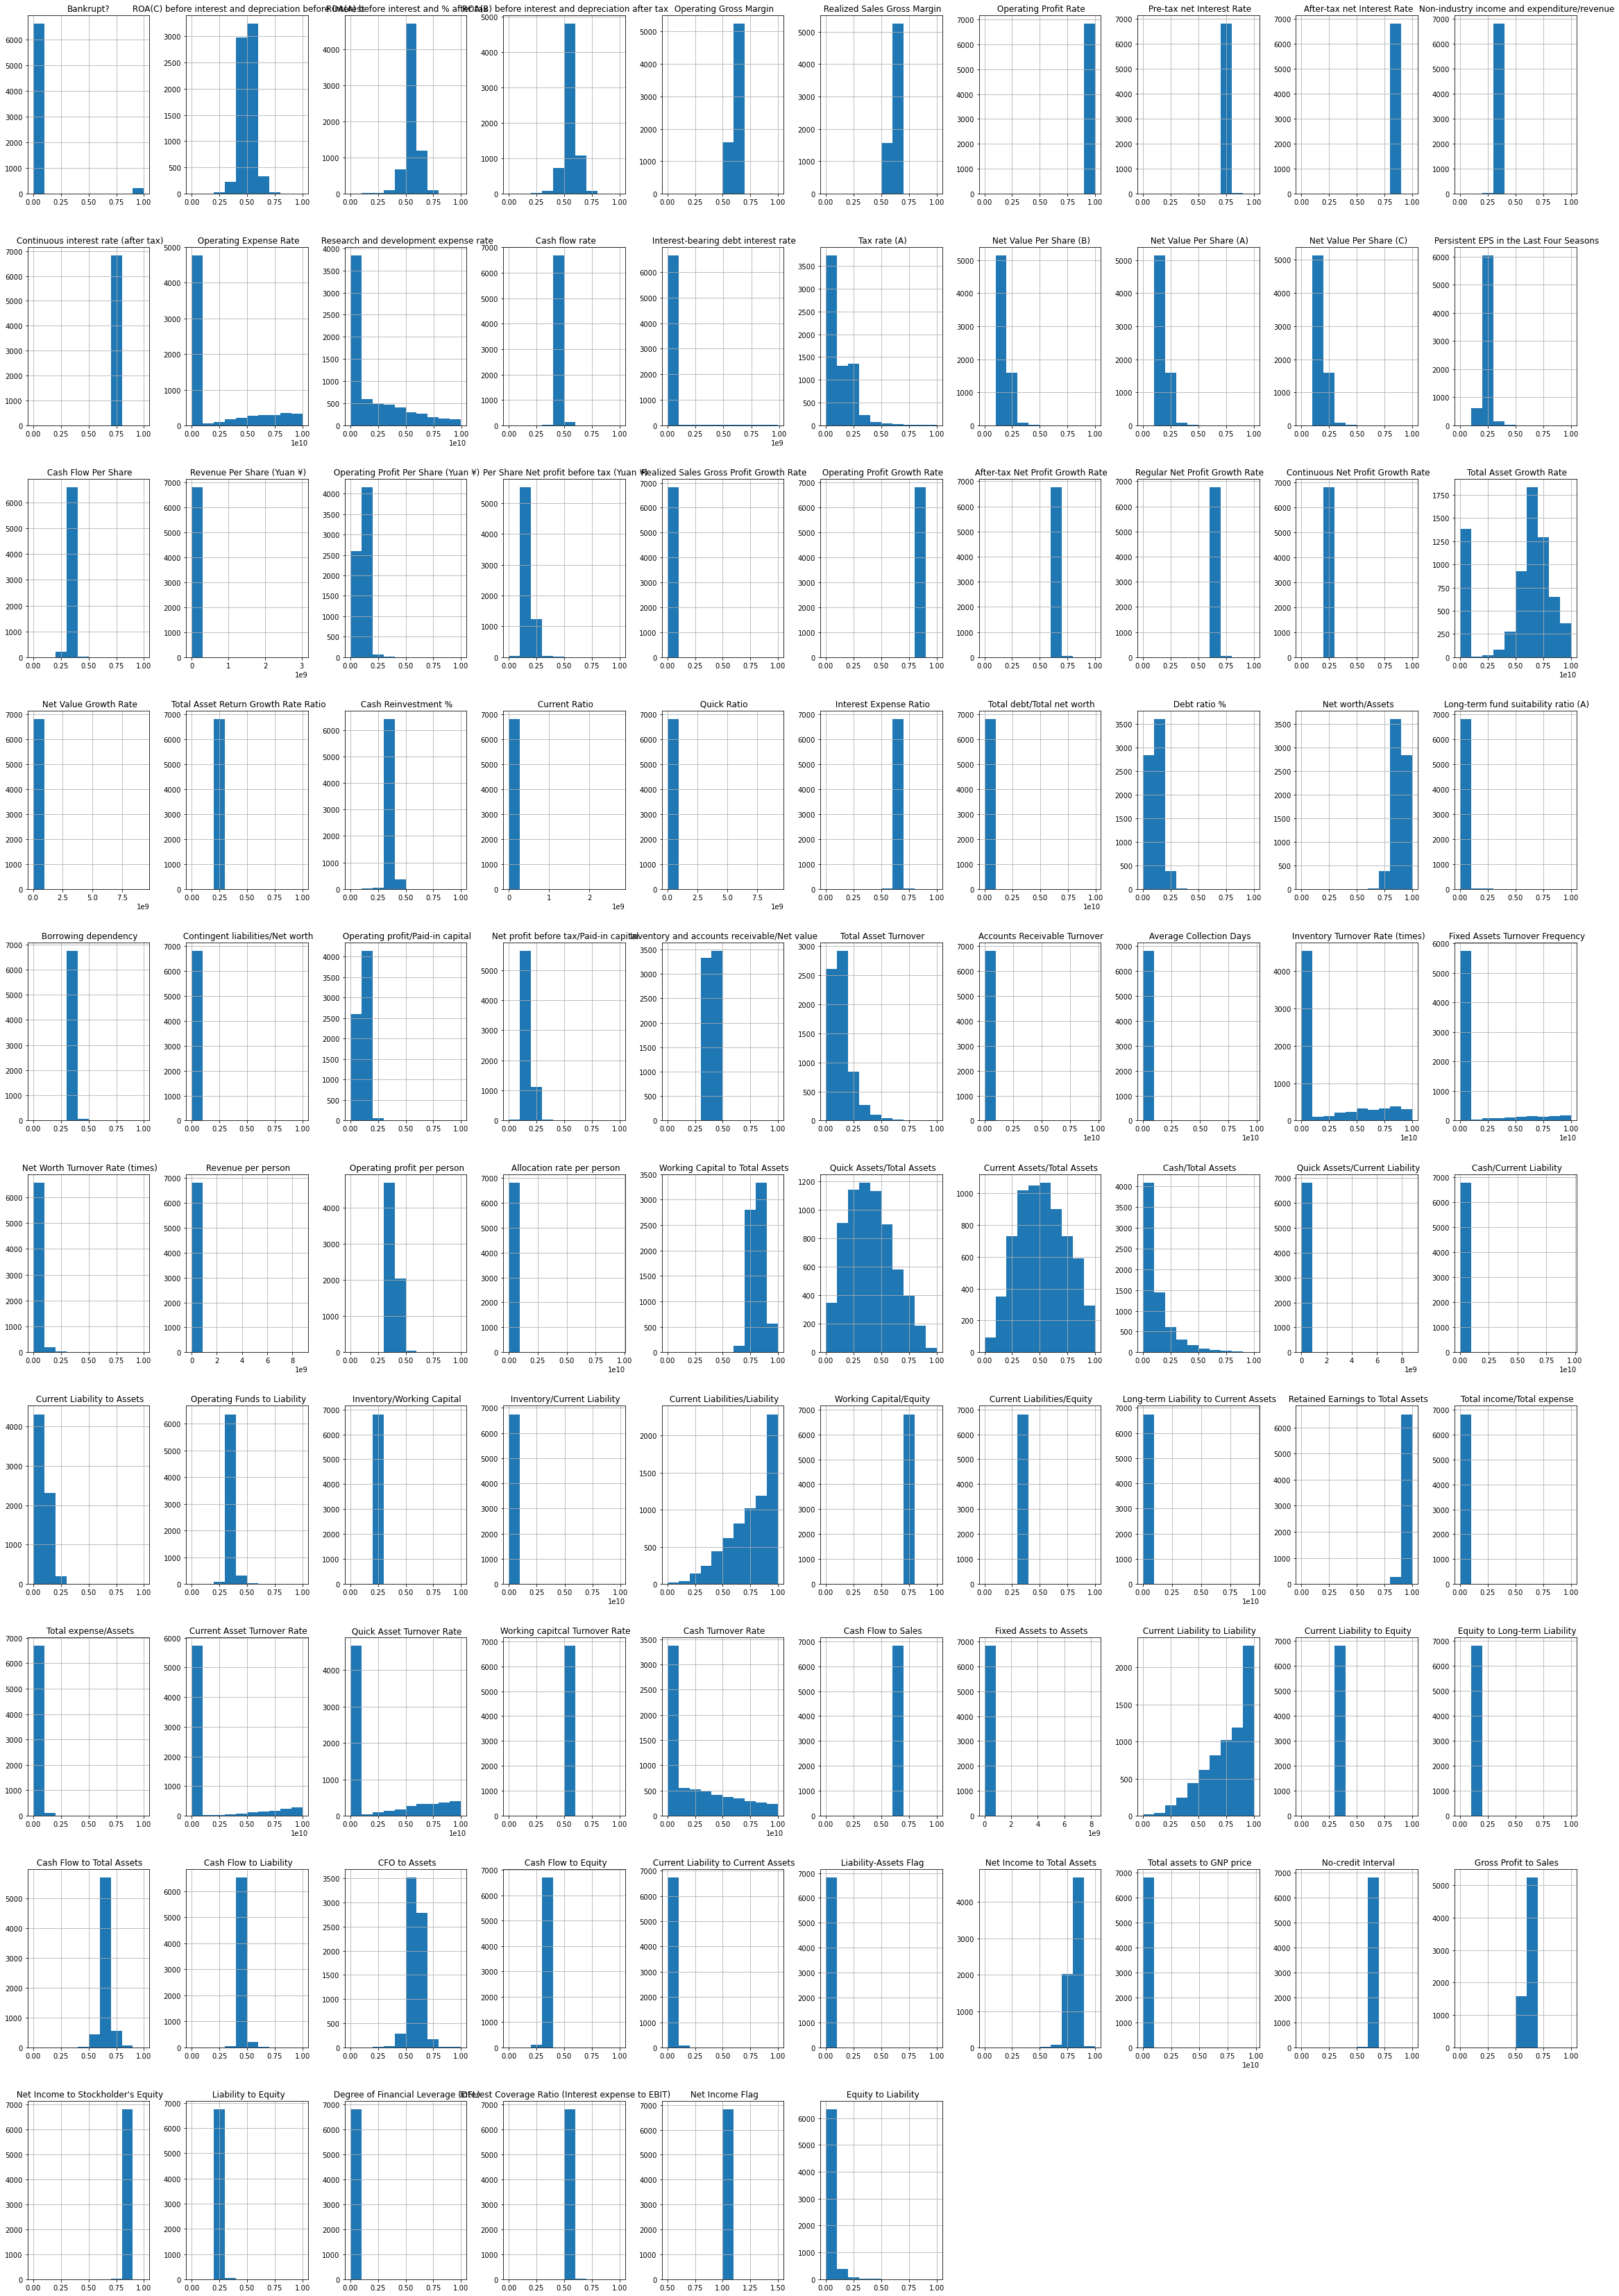

In [ ]:
data.hist(figsize=(40,60))
plt.show()

(array([6599.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         220.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

Counter({1: 220, 0: 6599})

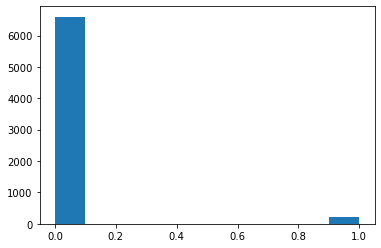

In [ ]:
plt.hist(data["Bankrupt?"])
from collections import Counter
Counter(data["Bankrupt?"])

## Modeling (3.0)

#### 3.1: Adjusting for Over/Under Sampling

The data mostly indicates that most records do not go bankrupt. We will use stratefied sampling to make sure that this population is not overrepresented in the models. 

(array([220.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 220.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

Counter({1: 220, 0: 220})

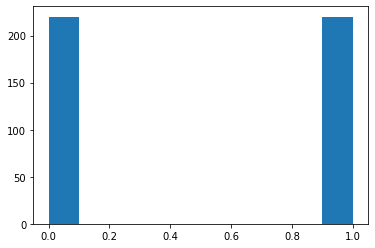

In [ ]:
# Shuffle the Dataset.
shuffled_df = data.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
y_1 = shuffled_df.loc[shuffled_df['Bankrupt?'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
y_0 = shuffled_df.loc[shuffled_df['Bankrupt?'] == 0].sample(n=220,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([y_1, y_0])
X = normalized_df.drop('Bankrupt?', axis=1)
y = normalized_df['Bankrupt?']
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

#show new data
plt.hist(normalized_df["Bankrupt?"])
from collections import Counter
Counter(normalized_df["Bankrupt?"])

#### 3.2: Model Building

#### 3.2.1: Crafting Appropriate Functions

In [ ]:
results = pd.DataFrame(columns = ['Model', 'TPR', 'FPR', 'Precision', 'Recall', 'Accuracy', 'f1-score'])

#### 3.2.2: SVM Model

In [ ]:
from sklearn.metrics import f1_score

#create model
model1 = SVC(probability=True, C=1, kernel='rbf')
sm = SMOTE(sampling_strategy='minority', random_state=42)
Xsm_train, ysm_train = sm.fit_resample(x_train, y_train)
model1 = model1.fit(Xsm_train, ysm_train)
prediction = model1.predict(x_test)
print(classification_report(y_test, prediction))

#======================================================================
cnf_matrix = confusion_matrix(y_test, model1.predict(x_test))
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

#eval
Model = 'SVM' 
TPR = [round(num, 2) for num in TPR]
FPR = [round(num, 2) for num in FPR]
precision = [round(num, 2) for num in PPV]
recall = [round(num, 2) for num in TPR]
accuracy = [round(num, 2) for num in ACC]
f1_score = round(f1_score(y_test, prediction),2)
row = [Model, TPR, FPR, precision, recall, accuracy, f1_score]
results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)
results

              precision    recall  f1-score   support

           0       0.67      0.70      0.69        44
           1       0.69      0.66      0.67        44

    accuracy                           0.68        88
   macro avg       0.68      0.68      0.68        88
weighted avg       0.68      0.68      0.68        88



,Model,TPR,FPR,Precision,Recall,Accuracy,f1-score
0,SVM,"[0.7, 0.66]","[0.34, 0.3]","[0.67, 0.69]","[0.7, 0.66]","[0.68, 0.68]",0.67


#### 3.2.3:  Logistic Regression

In [ ]:
from sklearn.metrics import f1_score

#create model
model2 = LogisticRegression(C=1.0, penalty='l2', solver='newton-cg')
sm = SMOTE(sampling_strategy='minority', random_state=42)
Xsm_train, ysm_train = sm.fit_resample(x_train, y_train)
model2 = model2.fit(Xsm_train, ysm_train)
prediction = model2.predict(x_test)
print(classification_report(y_test, prediction))

cnf_matrix = confusion_matrix(y_test, model2.predict(x_test))
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

#eval
Model = 'Logistic Regression'
TPR = [round(num, 2) for num in TPR]
FPR = [round(num, 2) for num in FPR]
precision = [round(num, 2) for num in PPV]
recall = [round(num, 2) for num in TPR]
accuracy = [round(num, 2) for num in ACC]
f1_score = round(f1_score(y_test, prediction),2)
row = [Model, TPR, FPR, precision, recall, accuracy, f1_score]
results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)
results

              precision    recall  f1-score   support

           0       0.63      0.73      0.67        44
           1       0.68      0.57      0.62        44

    accuracy                           0.65        88
   macro avg       0.65      0.65      0.65        88
weighted avg       0.65      0.65      0.65        88



,Model,TPR,FPR,Precision,Recall,Accuracy,f1-score
0,SVM,"[0.7, 0.66]","[0.34, 0.3]","[0.67, 0.69]","[0.7, 0.66]","[0.68, 0.68]",0.67
1,Logistic Regression,"[0.73, 0.57]","[0.43, 0.27]","[0.63, 0.68]","[0.73, 0.57]","[0.65, 0.65]",0.62
2,Naive Bayes,"[0.77, 0.57]","[0.43, 0.23]","[0.64, 0.71]","[0.77, 0.57]","[0.67, 0.67]",0.63
3,Random Forest Classifier,"[0.84, 0.93]","[0.07, 0.16]","[0.92, 0.85]","[0.84, 0.93]","[0.89, 0.89]",0.89
4,Gradient Boosted Trees,"[0.82, 0.91]","[0.09, 0.18]","[0.9, 0.83]","[0.82, 0.91]","[0.86, 0.86]",0.87
5,Extra Trees,"[0.86, 0.95]","[0.05, 0.14]","[0.95, 0.88]","[0.86, 0.95]","[0.91, 0.91]",0.91
6,Logistic Regression,"[0.73, 0.57]","[0.43, 0.27]","[0.63, 0.68]","[0.73, 0.57]","[0.65, 0.65]",0.62


#### 3.2.4: Naive Bayes Model

In [ ]:
from sklearn.metrics import f1_score
model3 = GaussianNB(var_smoothing=1.0)
sm = SMOTE(sampling_strategy='minority', random_state=42)
Xsm_train, ysm_train = sm.fit_resample(x_train, y_train)
model3 = model3.fit(Xsm_train, ysm_train)
prediction = model3.predict(x_test)
print(classification_report(y_test, prediction))
 
cnf_matrix = confusion_matrix(y_test, model3.predict(x_test))
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

#eval
Model = 'Naive Bayes'
TPR = [round(num, 2) for num in TPR]
FPR = [round(num, 2) for num in FPR]
precision = [round(num, 2) for num in PPV]
recall = [round(num, 2) for num in TPR]
accuracy = [round(num, 2) for num in ACC]
f1_score = round(f1_score(y_test, prediction),2)
row3 = [Model, TPR, FPR, precision, recall, accuracy, f1_score]
results = results.append(pd.DataFrame([row3], columns=results.columns), ignore_index=True)
results

              precision    recall  f1-score   support

           0       0.64      0.77      0.70        44
           1       0.71      0.57      0.63        44

    accuracy                           0.67        88
   macro avg       0.68      0.67      0.67        88
weighted avg       0.68      0.67      0.67        88



,Model,TPR,FPR,Precision,Recall,Accuracy,f1-score
0,SVM,"[0.7, 0.66]","[0.34, 0.3]","[0.67, 0.69]","[0.7, 0.66]","[0.68, 0.68]",0.67
1,Logistic Regression,"[0.73, 0.57]","[0.43, 0.27]","[0.63, 0.68]","[0.73, 0.57]","[0.65, 0.65]",0.62
2,Naive Bayes,"[0.77, 0.57]","[0.43, 0.23]","[0.64, 0.71]","[0.77, 0.57]","[0.67, 0.67]",0.63
3,Random Forest Classifier,"[0.84, 0.93]","[0.07, 0.16]","[0.92, 0.85]","[0.84, 0.93]","[0.89, 0.89]",0.89
4,Gradient Boosted Trees,"[0.82, 0.91]","[0.09, 0.18]","[0.9, 0.83]","[0.82, 0.91]","[0.86, 0.86]",0.87
5,Extra Trees,"[0.86, 0.95]","[0.05, 0.14]","[0.95, 0.88]","[0.86, 0.95]","[0.91, 0.91]",0.91
6,Logistic Regression,"[0.73, 0.57]","[0.43, 0.27]","[0.63, 0.68]","[0.73, 0.57]","[0.65, 0.65]",0.62
7,Naive Bayes,"[0.77, 0.57]","[0.43, 0.23]","[0.64, 0.71]","[0.77, 0.57]","[0.67, 0.67]",0.63


#### 3.2.5: Analysis of F1-Score

Based on the 3 models created, logistic regression does significantly better than SVM and naive bayes. With the highest value being 1 and the lowest value being 0, this shows that there is room for improvement when it comes to balancing precision and recall. When first running this analysis, the SMOTE function was not used yielding lopsided data and even lower F1-scores. Rerunning with the SMOTE function yielded higher F1-values. Let us examine the precision and recall curves to see where we can improve the models.

#### 3.2.6: Random Forest Classifier

In [ ]:
from sklearn.metrics import f1_score

#create model
model4 = RandomForestClassifier(n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features='auto', max_depth=None, criterion='entropy', bootstrap=False)
sm = SMOTE(sampling_strategy='minority', random_state=42)
Xsm_train, ysm_train = sm.fit_resample(x_train, y_train)
model4 = model4.fit(Xsm_train, ysm_train)
prediction = model4.predict(x_test)
print(classification_report(y_test, prediction))

cnf_matrix = confusion_matrix(y_test, model4.predict(x_test))
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

#eval
Model = 'Random Forest Classifier' 
TPR = [round(num, 2) for num in TPR]
FPR = [round(num, 2) for num in FPR]
precision = [round(num, 2) for num in PPV]
recall = [round(num, 2) for num in TPR]
accuracy = [round(num, 2) for num in ACC]
f1_score = round(f1_score(y_test, prediction),2)
row4 = [Model, TPR, FPR, precision, recall, accuracy, f1_score]
results = results.append(pd.DataFrame([row4], columns=results.columns), ignore_index=True)
results

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        44
           1       0.85      0.93      0.89        44

    accuracy                           0.89        88
   macro avg       0.89      0.89      0.89        88
weighted avg       0.89      0.89      0.89        88



,Model,TPR,FPR,Precision,Recall,Accuracy,f1-score
0,SVM,"[0.7, 0.66]","[0.34, 0.3]","[0.67, 0.69]","[0.7, 0.66]","[0.68, 0.68]",0.67
1,Logistic Regression,"[0.73, 0.57]","[0.43, 0.27]","[0.63, 0.68]","[0.73, 0.57]","[0.65, 0.65]",0.62
2,Naive Bayes,"[0.77, 0.57]","[0.43, 0.23]","[0.64, 0.71]","[0.77, 0.57]","[0.67, 0.67]",0.63
3,Random Forest Classifier,"[0.84, 0.93]","[0.07, 0.16]","[0.92, 0.85]","[0.84, 0.93]","[0.89, 0.89]",0.89


#### 3.2.7: Gradient Boosted Trees

In [ ]:
from sklearn.metrics import f1_score

#create model
model5 = GradientBoostingClassifier()
sm = SMOTE(sampling_strategy='minority', random_state=42)
Xsm_train, ysm_train = sm.fit_resample(x_train, y_train)
model5 = model5.fit(Xsm_train, ysm_train)
prediction = model5.predict(x_test)
print(classification_report(y_test, prediction))

cnf_matrix = confusion_matrix(y_test, model5.predict(x_test))
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

#eval
Model = 'Gradient Boosted Trees' 
TPR = [round(num, 2) for num in TPR]
FPR = [round(num, 2) for num in FPR]
precision = [round(num, 2) for num in PPV]
recall = [round(num, 2) for num in TPR]
accuracy = [round(num, 2) for num in ACC]
f1_score = round(f1_score(y_test, prediction),2)
row5 = [Model, TPR, FPR, precision, recall, accuracy, f1_score]
results = results.append(pd.DataFrame([row5], columns=results.columns), ignore_index=True)
results

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        44
           1       0.83      0.91      0.87        44

    accuracy                           0.86        88
   macro avg       0.87      0.86      0.86        88
weighted avg       0.87      0.86      0.86        88



,Model,TPR,FPR,Precision,Recall,Accuracy,f1-score
0,SVM,"[0.7, 0.66]","[0.34, 0.3]","[0.67, 0.69]","[0.7, 0.66]","[0.68, 0.68]",0.67
1,Logistic Regression,"[0.73, 0.57]","[0.43, 0.27]","[0.63, 0.68]","[0.73, 0.57]","[0.65, 0.65]",0.62
2,Naive Bayes,"[0.77, 0.57]","[0.43, 0.23]","[0.64, 0.71]","[0.77, 0.57]","[0.67, 0.67]",0.63
3,Random Forest Classifier,"[0.84, 0.93]","[0.07, 0.16]","[0.92, 0.85]","[0.84, 0.93]","[0.89, 0.89]",0.89
4,Gradient Boosted Trees,"[0.82, 0.91]","[0.09, 0.18]","[0.9, 0.83]","[0.82, 0.91]","[0.86, 0.86]",0.87


#### 3.2.8: Extra Trees Model

In [ ]:
from sklearn.metrics import f1_score

#create model
model6 = ExtraTreesClassifier()
sm = SMOTE(sampling_strategy='minority', random_state=42)
Xsm_train, ysm_train = sm.fit_resample(x_train, y_train)
model6 = model6.fit(Xsm_train, ysm_train)
prediction = model6.predict(x_test)
print(classification_report(y_test, prediction))

cnf_matrix = confusion_matrix(y_test, model6.predict(x_test))
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

#eval
Model = 'Extra Trees' 
TPR = [round(num, 2) for num in TPR]
FPR = [round(num, 2) for num in FPR]
precision = [round(num, 2) for num in PPV]
recall = [round(num, 2) for num in TPR]
accuracy = [round(num, 2) for num in ACC]
f1_score = round(f1_score(y_test, prediction),2)
row6 = [Model, TPR, FPR, precision, recall, accuracy, f1_score]
results = results.append(pd.DataFrame([row6], columns=results.columns), ignore_index=True)
results

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        44
           1       0.88      0.95      0.91        44

    accuracy                           0.91        88
   macro avg       0.91      0.91      0.91        88
weighted avg       0.91      0.91      0.91        88



,Model,TPR,FPR,Precision,Recall,Accuracy,f1-score
0,SVM,"[0.7, 0.66]","[0.34, 0.3]","[0.67, 0.69]","[0.7, 0.66]","[0.68, 0.68]",0.67
1,Logistic Regression,"[0.73, 0.57]","[0.43, 0.27]","[0.63, 0.68]","[0.73, 0.57]","[0.65, 0.65]",0.62
2,Naive Bayes,"[0.77, 0.57]","[0.43, 0.23]","[0.64, 0.71]","[0.77, 0.57]","[0.67, 0.67]",0.63
3,Random Forest Classifier,"[0.84, 0.93]","[0.07, 0.16]","[0.92, 0.85]","[0.84, 0.93]","[0.89, 0.89]",0.89
4,Gradient Boosted Trees,"[0.82, 0.91]","[0.09, 0.18]","[0.9, 0.83]","[0.82, 0.91]","[0.86, 0.86]",0.87
5,Extra Trees,"[0.86, 0.95]","[0.05, 0.14]","[0.95, 0.88]","[0.86, 0.95]","[0.91, 0.91]",0.91


#### 3.2.9: Analysis of Random Forest, Boosted Trees and Extra Trees

The newly added models this week have strong precision, recall, and accuracy but are seeing low FPR and high TPR. These three models have strong F1-scores compared to the models of last week, which is great ot see.  

#### 3.3: ROC and Precision / Recall graphs

#### 3.3.1: SVM

In [ ]:
y_score = model1.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

#=====================================

precision, recall, thresholds = precision_recall_curve(y_test, y_score)

fig = px.area(
    x=recall, y=precision,
    title=f'Precision-Recall Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='Recall', y='Precision'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')

fig.show()

#### 3.3.2: Logistic Regression

In [ ]:
y_score = model2.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

#=====================================

precision, recall, thresholds = precision_recall_curve(y_test, y_score)

fig = px.area(
    x=recall, y=precision,
    title=f'Precision-Recall Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='Recall', y='Precision'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')

fig.show()

#### 3.3.3: Naive Bayes

In [ ]:
y_score = model3.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

#=====================================

precision, recall, thresholds = precision_recall_curve(y_test, y_score)

fig = px.area(
    x=recall, y=precision,
    title=f'Precision-Recall Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='Recall', y='Precision'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')

fig.show()

#### 3.3.4: Analysis of Curves

From all SVM and Naive Bayes graphs, the precision-recall curves indicate that there is high precision with a trade off of very low recall. And vice-versa, there is a high recall with a trade of of low precision. There is not quite a balance, and perhaps tuning the models using a different scoring method will improve the precision-recall graphs. On the other hand, the logistic regression does a great job of having high precision and accuracy without needing to trade off too much of one or the other.

## Conclusion (4.0)

As described in the Module 5 Assignment 2 Requirements section on Canvas, please reference how I addressed each stated requirement/question below:
- <b>Conduct / improve upon previous EDA</b> This was addressed in section 2.0.
- <b>Build at least three models: Random Forest Classifier, Gradient Boosted Trees, Extra Trees</b> This was addressed in section 3.2.6, 3.2.7, and 3.2.8.
- <b>Conduct hyperparameter tuning for the following at a minimum: n_estimators, max_features, max_depth, splitting criteria</b> This was addressed in section 3.2.6, 3.2.7, and 3.2.8.
- <b>Compare your models using the F1-Score on a 20% validation set:</b> 

In [ ]:
results

,Model,TPR,FPR,Precision,Recall,Accuracy,f1-score
0,SVM,"[0.7, 0.66]","[0.34, 0.3]","[0.67, 0.69]","[0.7, 0.66]","[0.68, 0.68]",0.67
1,Logistic Regression,"[0.73, 0.57]","[0.43, 0.27]","[0.63, 0.68]","[0.73, 0.57]","[0.65, 0.65]",0.62
2,Naive Bayes,"[0.77, 0.57]","[0.43, 0.23]","[0.64, 0.71]","[0.77, 0.57]","[0.67, 0.67]",0.63
3,Random Forest Classifier,"[0.84, 0.93]","[0.07, 0.16]","[0.92, 0.85]","[0.84, 0.93]","[0.89, 0.89]",0.89
4,Gradient Boosted Trees,"[0.82, 0.91]","[0.09, 0.18]","[0.9, 0.83]","[0.82, 0.91]","[0.86, 0.86]",0.87
5,Extra Trees,"[0.86, 0.95]","[0.05, 0.14]","[0.95, 0.88]","[0.86, 0.95]","[0.91, 0.91]",0.91
6,Logistic Regression,"[0.73, 0.57]","[0.43, 0.27]","[0.63, 0.68]","[0.73, 0.57]","[0.65, 0.65]",0.62
7,Naive Bayes,"[0.77, 0.57]","[0.43, 0.23]","[0.64, 0.71]","[0.77, 0.57]","[0.67, 0.67]",0.63


- <b> Generate predictions from your models, and submit at least two models to Kaggle.com for evaluation. Provide your Kaggle.com user name and a screen snapshot of your scores</b> Not Applicable.